# Python Exercises


## 1. Factorial:

In [30]:
import numpy as np
import matplotlib.pyplot as plt

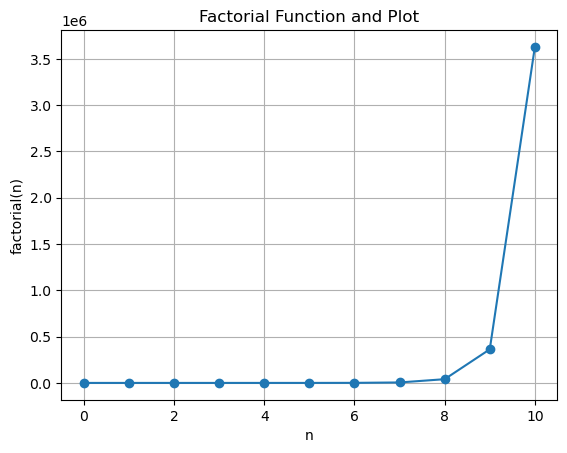

In [34]:
def factorial(n):
    if n < 0:
        return "invalid"
    else:
        k = 1
        for i in range(1,n+1):
            k *= i
        return k


n_values = list(range(0, 11))
fact_values = [factorial(n) for n in n_values]

plt.plot(n_values, fact_values, marker="o")
plt.xlabel("n")
plt.ylabel("factorial(n)")
plt.title("Factorial Function and Plot")
plt.grid(True)
plt.show()

In [35]:
print(factorial(3))

6


## 2. Taylor Approximiation of Sine

In [42]:
def taylor_sin(x,n):
    res = 0
    for i in range(n):
        res += pow(-1.0,i)*(pow(x,2.0*i+1.0)/factorial(2*i+1))
    return res

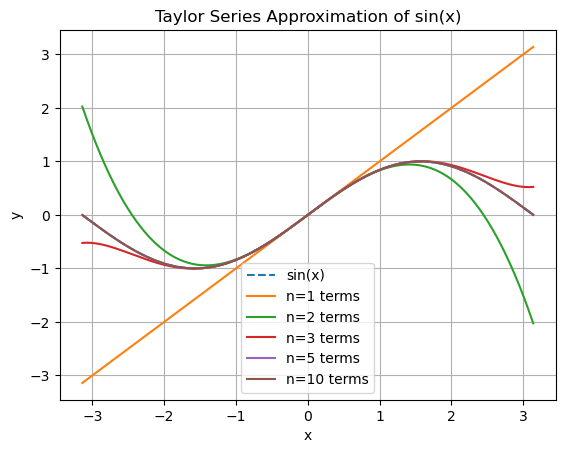

In [46]:
# x values from -pi to pi
x = np.linspace(-1*np.pi, np.pi, 400)

# true sine
y_true = np.sin(x)

plt.plot(x, y_true, label="sin(x)", linestyle="--")

# try different numbers of terms
for n in [1, 2, 3, 5, 10]:
    y_approx = [taylor_sin(val, n) for val in x]
    plt.plot(x, y_approx, label=f"n={n} terms")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Taylor Series Approximation of sin(x)")
plt.legend()
plt.grid(True)
plt.show()


## 3. Dot product and Angle Between Vectors

In [52]:
def compute_angle(a, b):
    return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))

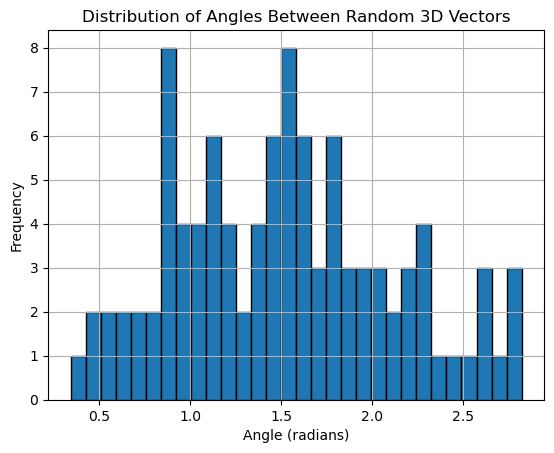

In [72]:
angles = []


for _ in range(100):
    a = np.random.randn(3)
    b = np.random.randn(3)
    angle = compute_angle(a,b)
    angles.append(angle)
    
angles = np.array(angles)
plt.hist(angles, bins=30, edgecolor="black")
plt.xlabel("Angle (radians)")
plt.ylabel("Frequency")
plt.title("Distribution of Angles Between Random 3D Vectors")
plt.grid(True)
plt.show()

## 4. Matrix Equation Solver

In [73]:
def solve_linear_system(A, b):
    Ainv = np.linalg.inv(A)
    x = Ainv @ b
    return x

In [77]:
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])

b = np.array([8, -11, -3])
print(solve_linear_system(A,b))

[ 2.  3. -1.]


## 5. Projectile Motion Simulation

In [93]:
def proj_motion_sim(v,theta_deg, dt=0.01):
    theta = np.deg2rad(theta_deg)
    t = 0.0
    times, heights = [], []
    h_max, t_at_max = 0.0,0.0
    while True:
        h = (v*np.sin(theta)*t) - (0.5*9.8*pow(t,2))
        if h < 0 and t > 0:
            break
        times.append(t)
        heights.append(max(h,0.0))
        if h > h_max:
            h_max, t_at_max = h,t
        t += dt

    return np.array(times), np.array(heights), h_max, t_at_max

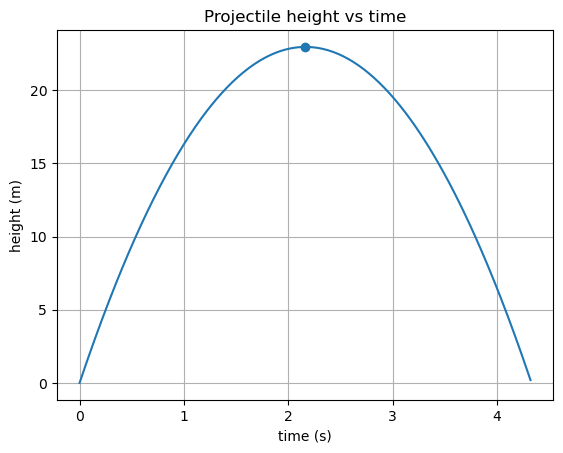

In [95]:
v = 30.0
theta_deg = 45.0
t, h, h_max, t_max = proj_motion_sim(v, theta_deg)

plt.plot(t,h, label="h(t)")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.title("Projectile height vs time")
plt.grid(True)
plt.scatter([t_max], [h_max])
plt.show()


## 6. Monte Carlo Estimate of Pi

pi estimate: 3.14224


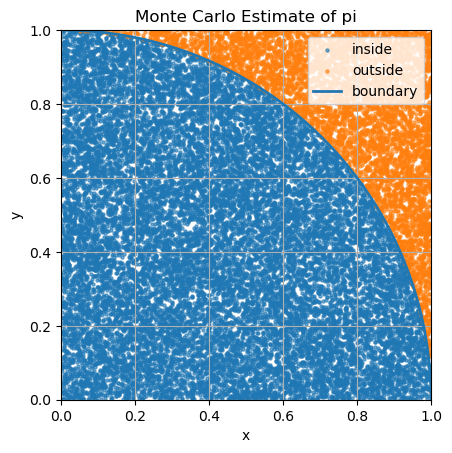

In [149]:
def monte_carlo_pi(N, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.random(N)
    y = rng.random(N)
    inside = (x*x + y*y) <= 1.0                 
    pi_hat = 4.0 * inside.mean()                
    return pi_hat, x, y, inside

pi_est, x, y, inside = monte_carlo_pi(N=25000, seed=109321321489237453298523)
print(f"pi estimate: {pi_est:.5f}")


plt.figure()
plt.scatter(x[inside],  y[inside],  s=5, alpha=0.6, label="inside")
# ~inside = not inside, logical NOT
plt.scatter(x[~inside], y[~inside], s=5, alpha=0.6, label="outside")


t = np.linspace(0, np.pi/2, 200)
plt.plot(np.cos(t), np.sin(t), linewidth=2, label="boundary")

plt.gca().set_aspect("equal", adjustable="box")
plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel("x"); plt.ylabel("y")
plt.title("Monte Carlo Estimate of pi")
plt.legend()
plt.grid(True)
plt.show()
